# Regularized logistic regression
Our dataset set represents whether microchips have passed a QA based on two tests. Hence the format of the dataset is test1, test2, Passed

In [34]:
#Importing needed modules
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [35]:
#Reading data from the file
data_folder = Path(r'C:\Users\anast\PycharmProjects\ML\machine-learning-ex2\ex2')
file = data_folder / 'ex2data2.txt'
dataset = np.loadtxt(file, delimiter = ',')

In [36]:
m, n = dataset.shape

In [37]:
#Let's filer positives and negative values
mask = dataset[:,n-1] == 1.0
positives = dataset[mask, 0:2]
negatives = dataset[~mask, 0:2]

## Visualization

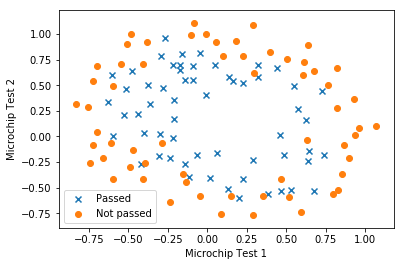

In [38]:
#Let's plot the  values
%matplotlib inline
plt.scatter(positives[:,0], positives[:,1], marker = 'x', label = 'Passed')
plt.scatter(negatives[:,0], negatives[:,1], marker = 'o', label = 'Not passed')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend()

## Creating a bigger feature space to fit boundary decision

Clearly, with only two features it is impossible to create a more complicated shape rather than a straight line passing through the dataset. Hence, we will create a 28 feature vector with the product of all polynomial term of features x1, x2 up to degree 6

In [39]:
def mapFeature(X1, X2):
    degree = 6
    m = len(X1)
    out = np.ones((m, 1))
    for i in range(1, degree+1):
        for j in range(0,i+1):
            out = np.concatenate((out,np.multiply(np.power(X1, i-j), np.power(X2, j)).reshape(m,1)), axis=1)
    return out

In [40]:
X = mapFeature(dataset[:, 0], dataset[:, 1])
y = dataset[:,2]

In [41]:
X[0, :]

array([1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
       3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
       2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
       1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
       4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
       1.67542444e-01, 1.81563032e-08, 2.47750473e-07, 3.38066048e-06,
       4.61305487e-05, 6.29470940e-04, 8.58939846e-03, 1.17205992e-01])

## Finding optimal values of $\theta$ using Scipy optimization 'TNC'

In [81]:
import LogisticRegression
import importlib
importlib.reload(LogisticRegression)

<module 'LogisticRegression' from 'C:\\Users\\anast\\PycharmProjects\\ML\\EX2\\LogisticRegression.py'>

In [82]:
from LogisticRegression import cost_function_Reg, gradient_Reg

In [80]:
#Updating the feature space
m, n = X.shape
initial_theta = np.zeros(n)

In [83]:
#A check to see that the methods work properly
jval = cost_function_Reg(initial_theta, X, y, lamb)
gradient = gradient_Reg(initial_theta, X, y, lamb)

In [84]:
import scipy.optimize as op
lamb = 1
R = op.minimize(cost_function_Reg, initial_theta, args = (X,y, lamb), jac = gradient_Reg, method='TNC')

In [85]:
R.message

'Local minimum reached (|pg| ~= 0)'

In [86]:
optimal_theta = R.x

In [87]:
len(optimal_theta)

28

## Visualizing data with boundary plot 

Different values of $\lambda$ will yield different values for $\theta$. For $\lambda = 0$, we assume no penalization so our training set will **overfit** the training set. For $\lambda = 1$, the penalization is ***just right***. Finally, for $\lambda = 100$ or any number too big, the penalization will be too much yielding $\theta_{j} \approx 0 $ for $i \geq 1$ yielding to an **underfit**. Please re-compute optimization with different values of $\lambda$ and run this section for visualization

In [124]:
#Let's try to visualize the decision boundary
importlib.reload(LogisticRegression)
from LogisticRegression import plotDecisionBoundary

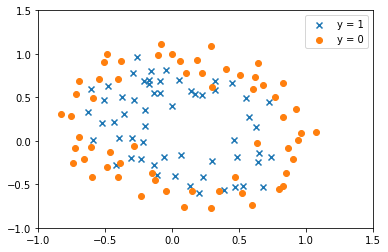

In [125]:
plotDecisionBoundary(optimal_theta, X, y)